In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Enrique's code starts here

In [2]:
# read in the data
employment_data = pd.read_csv("Resources/Average annual hours actually worked.csv")
happiness_data = pd.read_csv("Resources/World Happiness Report 2018.csv")

In [3]:
# clean up employment_data

# get only relevant rows
employment_data = employment_data[["Country", "Employment status", "Time", "Value"]]

# get only total employment
total_employment = employment_data.loc[employment_data["Employment status"] == "Total employment"]

# get only 2018 data
total_employment_2018 = total_employment.loc[total_employment["Time"] == 2018]

# sort by country
total_employment_2018 = total_employment_2018.sort_values(by="Country")

# rename columns and get a final dataframe
total_employment_2018 = total_employment_2018[["Country", "Value"]]
total_employment_2018 = total_employment_2018.rename(columns={"Value": "Avg Hours Worked per Worker"})

In [4]:
# clean up happiness_data

# rename country column for merging
happiness_data = happiness_data.rename(columns={"Country or region": "Country"})

In [5]:
# merge happiness data into the employment data
data = pd.merge(total_employment_2018, happiness_data, how="left", on="Country")

# clean up merged data
data = data.dropna()

34


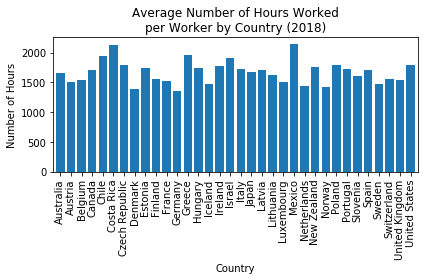

In [6]:
# Plot Average Number of Hours Worked per Worker by Country

# countries list and tick locations
countries = data["Country"].tolist()
tick_locations = np.arange(len(countries))

# dataframe for plot
hours_worked = data[["Country", "Avg Hours Worked per Worker"]]

# plot the data
hours_worked.plot(kind="bar", legend=False, width=.8)

# assign xticks
plt.xticks(tick_locations, countries, rotation=90)

# title and labels
plt.title(f"Average Number of Hours Worked\n"
          f"per Worker by Country (2018)")
plt.xlabel("Country")
plt.ylabel("Number of Hours")

print(len(countries))
# display plot
plt.tight_layout()
plt.show()

The r-squared value is: 0.18
The p-value is: 0.01


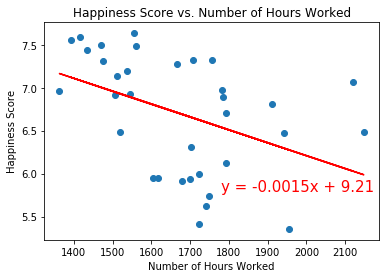

In [7]:
# Regression Analysis for Question #1
# Hypothesis: Countries with lower working hours will tend to have a higher happiness score.

# define independent and dependent variables
independent_variable = "Avg Hours Worked per Worker"
dependent_variable = "Score"

# define title and labels
xlabel = "Number of Hours Worked"
ylabel = "Happiness Score"
title = f"{ylabel} vs. {xlabel}"

# create dataframe
hours_and_happiness = data[["Country", independent_variable, dependent_variable]]

# define x and y values
x_values = hours_and_happiness[independent_variable]
y_values = hours_and_happiness[dependent_variable]

# run regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression values
regress_values = x_values * slope + intercept

# create line equation
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 2)}"

# plot the data
plt.scatter(x_values, y_values)

# plot the regression line
plt.plot(x_values, regress_values, "r-")

# add equation
plt.annotate(line_eq, (1780, 5.8), fontsize=15, color="red")

# add title and labels to plot
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# print summary data
print(f"The r-squared value is: {round(rvalue**2, 2)}")
print(f"The p-value is: {round(pvalue, 2)}")

# display the plot
plt.show()

### Enrique's code ends here

## Jake's code starts here

### Jake's code ends here

## Yee's code starts here

### Yee's code ends here